# Rishik Reddy Bandi
# 220968300


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [5]:
df=pd.read_csv("Dataset1.csv")
df

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [6]:
df.isnull().sum()

Outlook        0
Temperature    0
Humidity       0
Wind           0
Play Tennis    0
dtype: int64

In [7]:
features=df.iloc[:,:-1]
def label(df):
    le=LabelEncoder()
    for column in df.columns:
        df[column]=le.fit_transform(df[column])
    return df
features=label(features)
features

C:\Users\rrban\AppData\Local\Temp\ipykernel_4348\2590391308.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column]=le.fit_transform(df[column])
C:\Users\rrban\AppData\Local\Temp\ipykernel_4348\2590391308.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column]=le.fit_transform(df[column])
C:\Users\rrban\AppData\Local\Temp\ipykernel_4348\2590391308.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

,Outlook,Temperature,Humidity,Wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [9]:
y=df["Play Tennis"]
y

0      No
1      No
2     Yes
3     Yes
4     Yes
5      No
6     Yes
7      No
8     Yes
9     Yes
10    Yes
11    Yes
12    Yes
13     No
Name: Play Tennis, dtype: object

In [10]:
x_train,x_test,y_train,y_test=train_test_split(features,y,test_size=0.3)

In [13]:
model=DecisionTreeClassifier(criterion="entropy")

In [15]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [18]:
y_pred=model.predict(x_test)
y_pred

array(['Yes', 'Yes', 'Yes', 'Yes', 'Yes'], dtype=object)

In [21]:
model.score(x_test,y_test)

0.8

In [22]:
accuracy_score(y_test,y_pred)

0.8

In [23]:
model.feature_importances_

array([0.56274972, 0.        , 0.2130271 , 0.22422318])

In [25]:
model.tree_.max_depth

4

<Axes: >

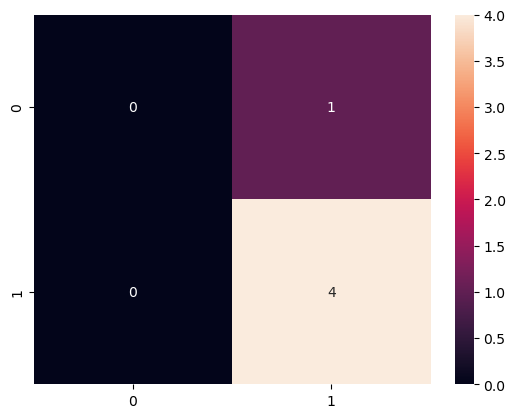

In [27]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

In [30]:
feature_names=features.columns
fnl = feature_names.tolist()
class_names=df["Play Tennis"]
cnl = class_names.tolist()

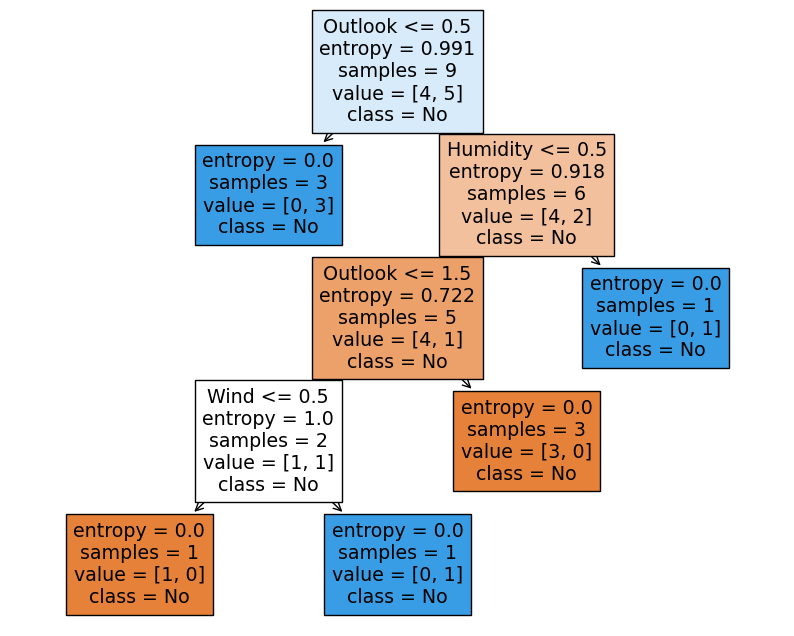

In [32]:
from sklearn import tree
plt.figure(figsize=(10,8))
tree.plot_tree(model,feature_names=fnl,  class_names=cnl,filled=True)
plt.show()

In [34]:
with open('DT1.txt',"w") as f:
    f=tree.export_graphviz(model,out_file=f)